# FarahQumuq B2280.060023

center:(y=92, x=92)
center intensity:[ 67  92 172]
center intensity after edit:[168 158  50]


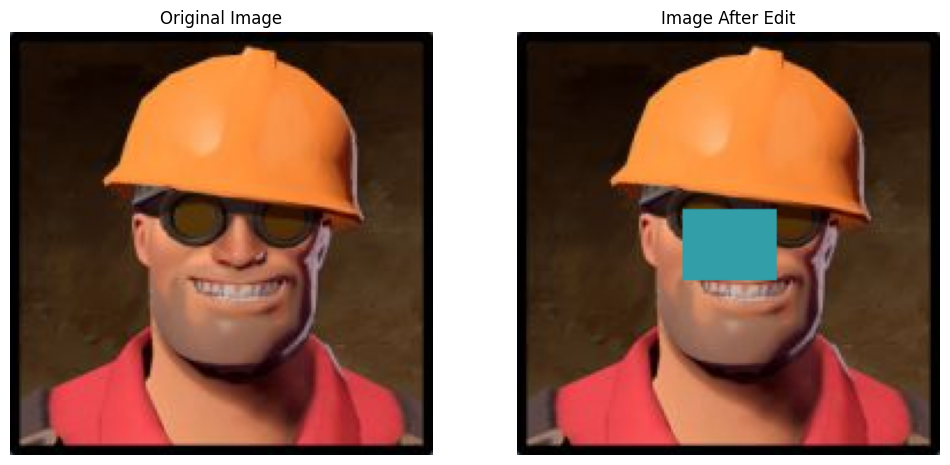

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\Legion\Desktop\Codes\Python\Img Pro\tf2_engineer.jpg"
image = cv2.imread(image_path)

h, w, _ = image.shape
ycenter = h // 2
xcenter = w // 2
center_intensity = image[ycenter, xcenter]
print(f"center:(y={ycenter}, x={xcenter})")
print(f"center intensity:{center_intensity}")
heightpatch = 30
widthpatch = 40
top_left_y = ycenter - heightpatch // 2
top_left_x = xcenter - widthpatch // 2
bottom_right_y = top_left_y + heightpatch
bottom_right_x = top_left_x + widthpatch
hex_color = "#329ea8"
rgb_color = tuple(int(hex_color.lstrip("#")[i:i + 2], 16) for i in (0, 2, 4))
bgr_color = (rgb_color[2], rgb_color[1], rgb_color[0])
image_after_edit = image.copy()
cv2.rectangle(image_after_edit, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), bgr_color, thickness=-1)
patch_center_intensity = image_after_edit[ycenter, xcenter]
print(f"center intensity after edit:{patch_center_intensity}")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_after_edit_rgb = cv2.cvtColor(image_after_edit, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_after_edit_rgb)
plt.title("Image After Edit")
plt.axis('off')
plt.show()

# in this code i displayed the original image and put a small colored patch in the center then the code checks the pixel brightness at the center before and after adding the patch then displays both the original and edited images side by side to see the difference

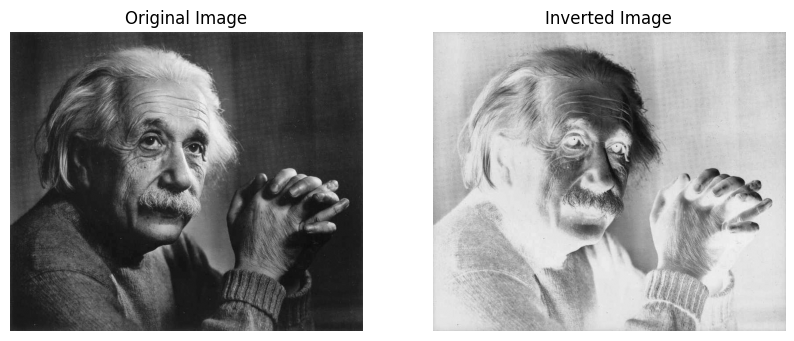


Intensity values of random pixels:
Pixel 1 y=184, x=644: original = 102, edited = 153
Pixel 2 y=279, x=404: original = 126, edited = 129
Pixel 3 y=432, x=603: original = 120, edited = 135
Pixel 4 y=164, x=427: original = 151, edited = 104
Pixel 5 y=375, x=39: original = 114, edited = 141


In [3]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

image_path = r"C:\Users\Legion\Desktop\Codes\Python\Img Pro\einstein.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_after_edit = 255 - image 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_after_edit, cmap='gray')
plt.title("Inverted Image")
plt.axis('off')

plt.show()

h, w = image.shape
print("\nIntensity values of random pixels:")
for i in range(5):
    y = random.randint(0, h - 1)
    x = random.randint(0, w - 1)
    originalimage = image[y, x]
    editedimage = image_after_edit[y, x]
    print(f"Pixel {i + 1} y={y}, x={x}: original = {originalimage}, edited = {editedimage}")

# in this code i displayed a grayscale image and created an inverted version by subtracting each pixel value from 255 it then displayed the original and inverted images side by side for comparison it randomly selects five pixels and prints their intensity values before and after the inversion to show how the pixel brightness changes

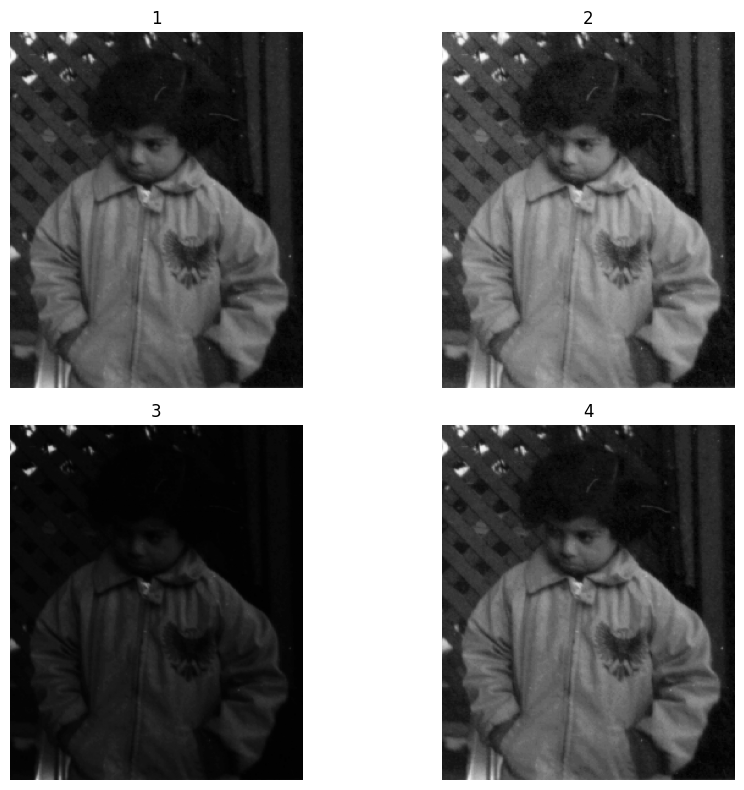

step 2 snhances dark areas and compresses bright areas, step 4 reverses step 2 because inverse and log cancel each other and makes it look like the original


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\Legion\Desktop\Codes\Python\Img Pro\pout.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(image))
second = c * np.log(1 + image.astype(np.float32))
second = np.uint8(np.clip(second, 0, 255))

third = np.exp(image.astype(np.float32) / c) - 1
third = np.uint8(np.clip(third, 0, 255))

fourth = np.exp(second.astype(np.float32) / c) - 1
fourth = np.uint8(np.clip(fourth, 0, 255))

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("1")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(second, cmap='gray')
plt.title("2")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(third, cmap='gray')
plt.title("3")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(fourth, cmap='gray')
plt.title("4")
plt.axis('off')

plt.tight_layout()
plt.show()

print("step 2 snhances dark areas and compresses bright areas, step 4 reverses step 2 because inverse and log cancel each other and makes it look like the original")

# in this code i applied logarithmic and exponential transformations to a grayscale image to enhance its contrast it first shows the original image then a log transformed image that brightens dark areas while compressing bright ones then i applied the exponential function to the original image followed by an exponential transformation of the log enhanced image which reverses the previous log step then it displays all four images side by side for comparison and explains how the transformations affects the image contrast

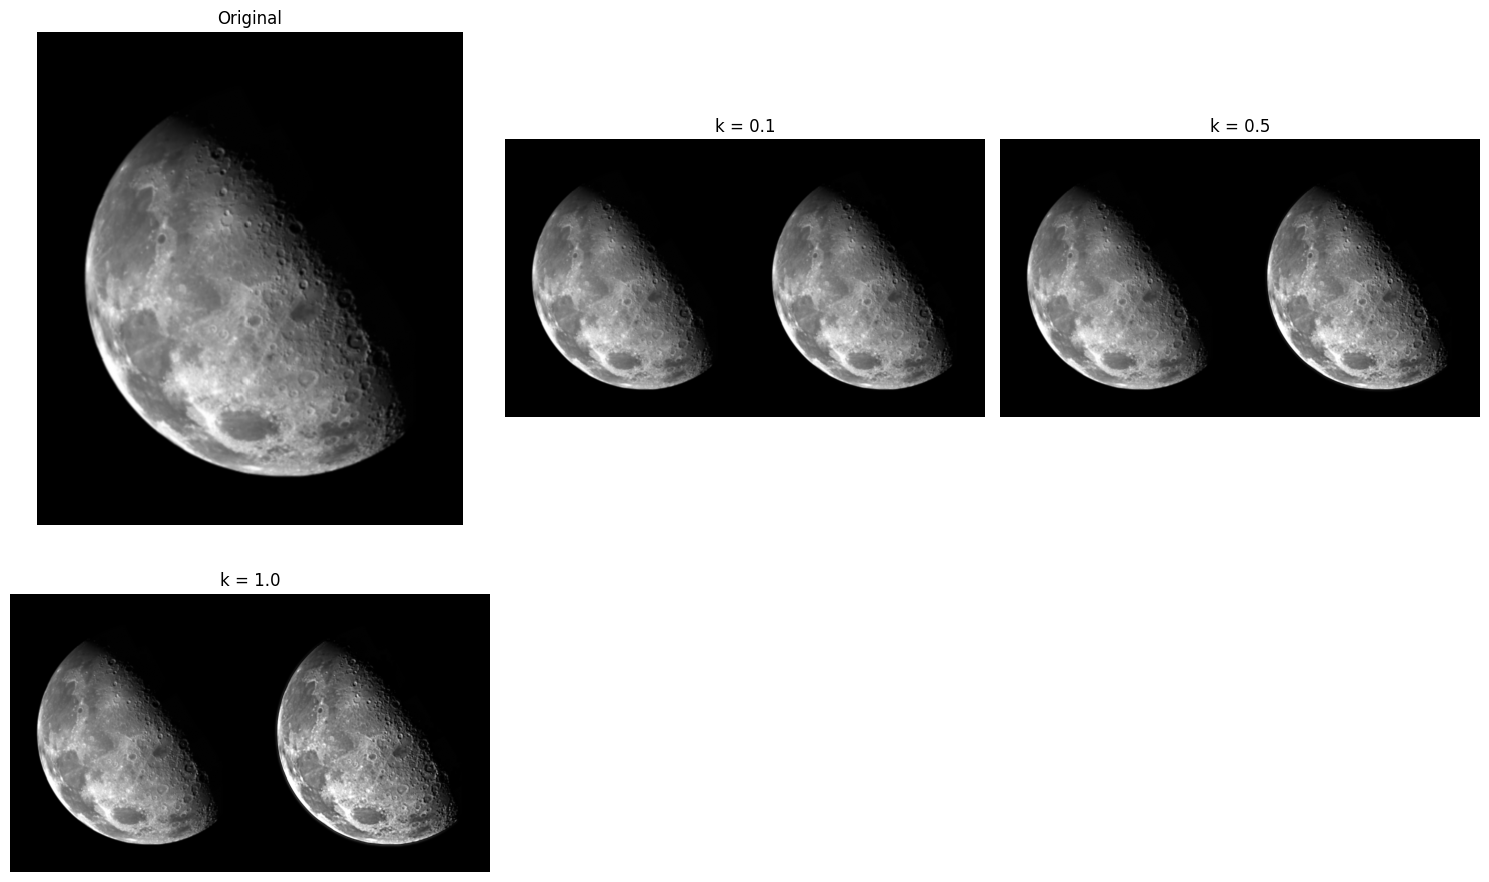

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\Legion\Desktop\Codes\Python\Img Pro\moon.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

k1 = 0.1
k2 = 0.5
k3 = 1.0
def unsharp_masking(img, k):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    mask = cv2.subtract(img, blurred)
    sharpened = cv2.addWeighted(img, 1.0, mask, k, 0)
    return sharpened

sharpened1 = unsharp_masking(image, k1)
sharpened2 = unsharp_masking(image, k2)
sharpened3 = unsharp_masking(image, k3)

D0 = 30
def unsharp_frequency(img, k, D0):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow) ** 2 + (V - ccol) ** 2)
    H = 1 - np.exp(-(D ** 2) / (2 * (D0 ** 2)))
    enhanced_dft = dft_shift * (1 + k * H)
    idft_shift = np.fft.ifftshift(enhanced_dft)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back

sharpened_1 = unsharp_frequency(image, k1, D0)
sharpened_2 = unsharp_frequency(image, k2, D0)
sharpened_3 = unsharp_frequency(image, k3, D0)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.hstack((sharpened1, sharpened_1)), cmap='gray')
plt.title("k = 0.1")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.hstack((sharpened2, sharpened_2)), cmap='gray')
plt.title("k = 0.5")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(np.hstack((sharpened3, sharpened_3)), cmap='gray')
plt.title("k = 1.0")
plt.axis('off')

plt.tight_layout()
plt.show()

# in this code i sharpened a grayscale image using two methods the spatial domain unsharp masking and the frequency domain filtering i applied unsharp masking with three different strength values K1, k2, k3 enhancing edges by subtracting a blurred version from the original image then i performed frequency domain sharpening by boosting high frequency components using a gaussian high pass filter the results are displayed side by side comparing the spatial and frequency methods along with the original image to visualize how sharpening varies with the parameter k

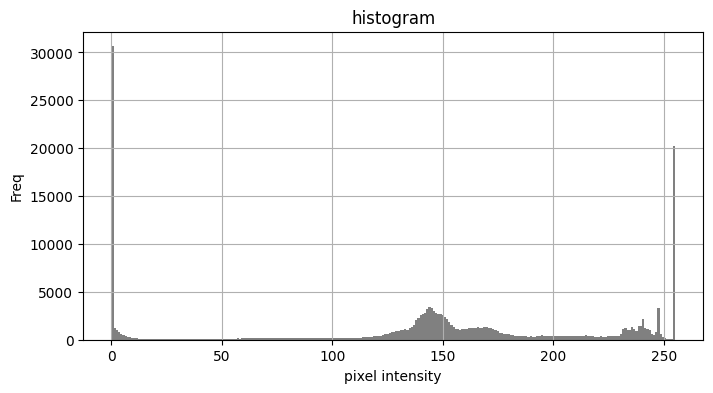

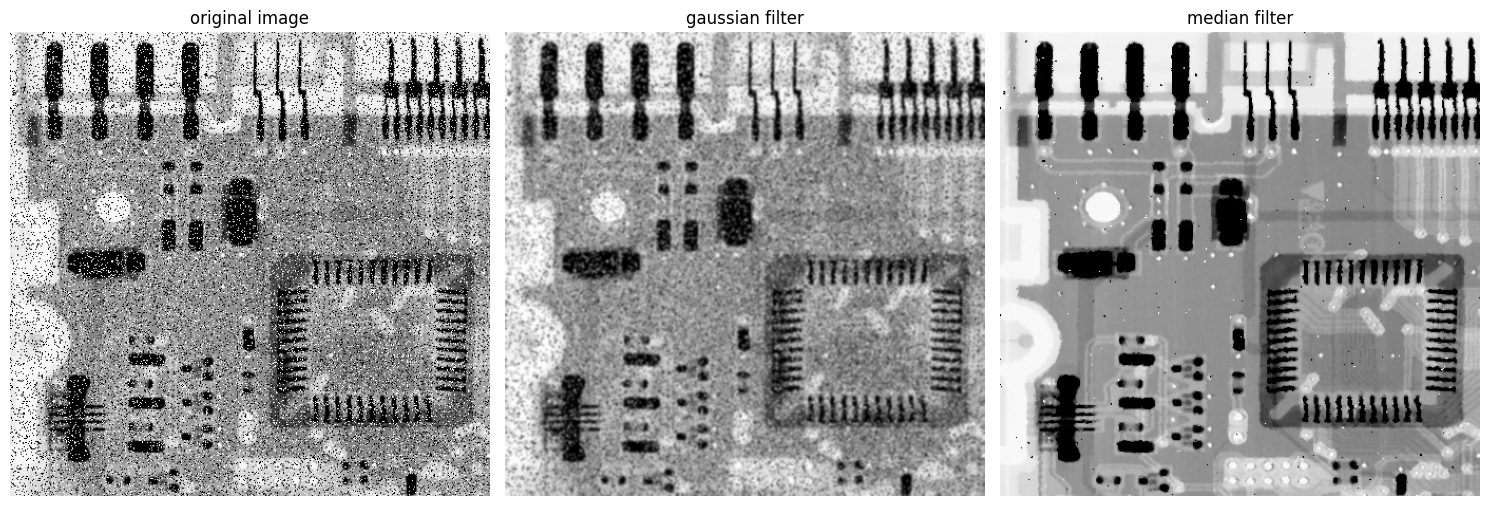

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\Legion\Desktop\Codes\Python\Img Pro\pcb.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 4))
plt.hist(image.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("histogram")
plt.xlabel("pixel intensity")
plt.ylabel("Freq")
plt.grid(True)
plt.show()

gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 1.0)
median_filtered = cv2.medianBlur(image, 3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("original image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("gaussian filter")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title("median filter")
plt.axis('off')

plt.tight_layout()
plt.show()

# in this code i displayed a grayscale image and displayed its pixel intensity histogram to show the distribution of brightness values i then applied two different filters a gaussian blur to smooth the image and reduce noise and a median filter which is removes salt and pepper noise finally i showed the original image alongside the results of both filtering methods allowing comparison of their effects on the image quality and noise reduction

original photo is washed out and the histogram shows no distribution in colors
mean: 109.08
std deviation: 11.49
equalized image made the dark areas in the original photo darker and the bright areas brighter
mean: 122.68
std deviation 77.39
brigt image makes the whole image brighter and shows in the histogram it is focused on the right of the graph
mean: 189.08
std deviation: 11.49


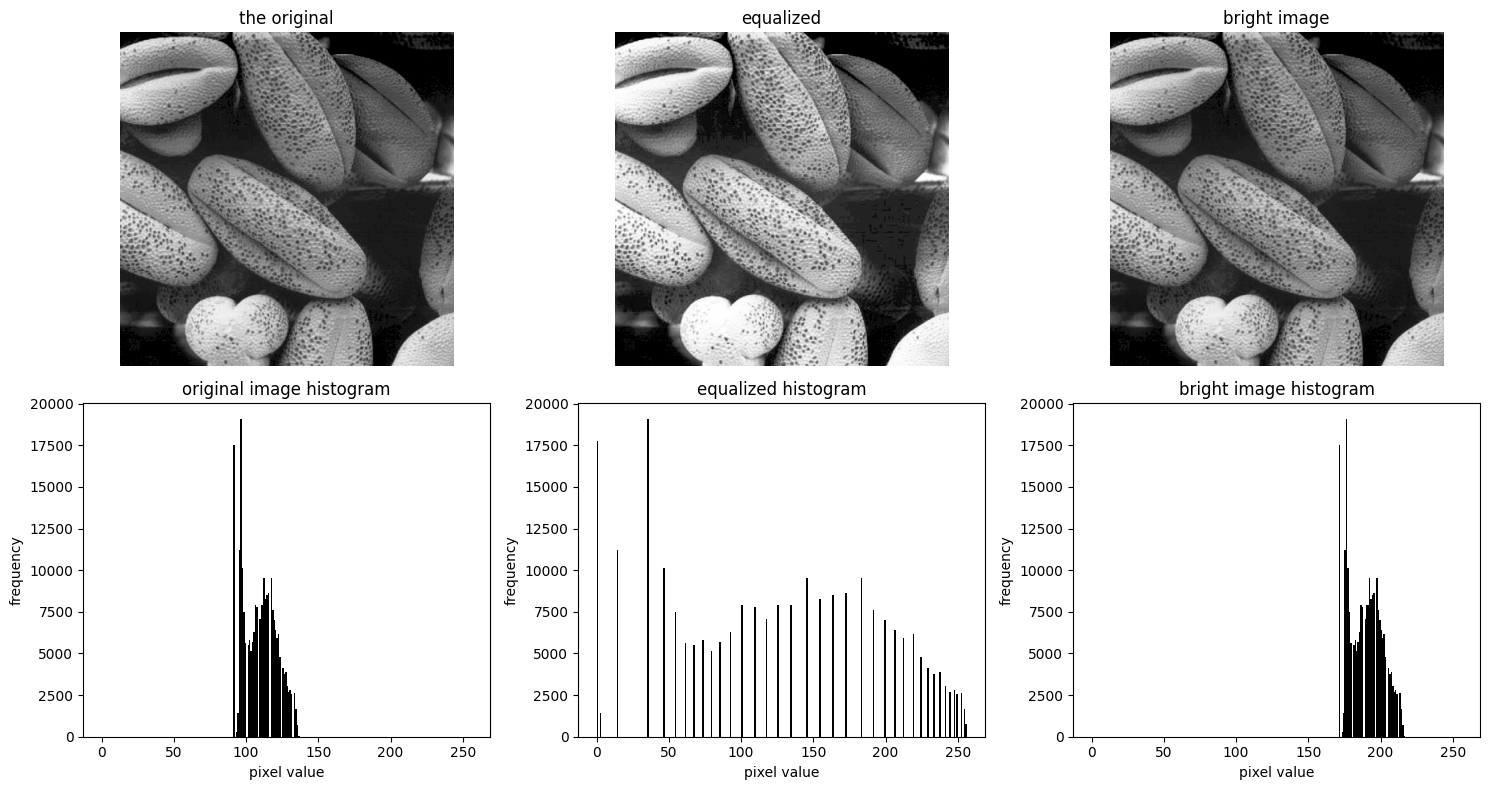

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\Legion\Desktop\Codes\Python\Img Pro\pollen.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

equalized = cv2.equalizeHist(image)
bright = 80
brightened = cv2.add(image, bright)

print("original photo is washed out and the histogram shows no distribution in colors")
print(f"mean: {np.mean(image):.2f}")
print(f"std deviation: {np.std(image):.2f}")

print("equalized image made the dark areas in the original photo darker and the bright areas brighter")
print(f"mean: {np.mean(equalized):.2f}")
print(f"std deviation {np.std(equalized):.2f}")

print("brigt image makes the whole image brighter and shows in the histogram it is focused on the right of the graph")
print(f"mean: {np.mean(brightened):.2f}")
print(f"std deviation: {np.std(brightened):.2f}")

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("the original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(equalized, cmap='gray')
plt.title("equalized")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(brightened, cmap='gray')
plt.title("bright image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("original image histogram")
plt.xlabel("pixel value")
plt.ylabel("frequency")

plt.subplot(2, 3, 5)
plt.hist(equalized.ravel(), bins=256, range=(0, 256), color='black')
plt.title("equalized histogram")
plt.xlabel("pixel value")
plt.ylabel("frequency")

plt.subplot(2, 3, 6)
plt.hist(brightened.ravel(), bins=256, range=(0, 256), color='black')
plt.title("bright image histogram")
plt.xlabel("pixel value")
plt.ylabel("frequency")

plt.tight_layout()
plt.show()

# in this code i displayed a grayscale image and performed two filters histogram equalization to improve contrast by spreading out pixel intensities and brightness increase by adding a constant value to all pixels it prints mean and standard deviation for the original equalized and brightened images to quantify changes then it displays the three images side by side along with their histograms showing how equalization improves contrast and how brightness shifts the histogram toward higher intensity values